# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Machine Translation of Canadian Parliament
Project mentor: Shuo Sun

Yihong Guo <yguo80@jh.edu>, Boyuan Zheng <bzheng12@jh.edu>, Xin Tao<xtao10@jh.edu>, Fangying Zhan<fzhan2@jh.edu>

https://github.com/boyuanzheng010/Hansard-English-French-Translation

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

<!-- FIXME: Copied from proposal -->

{Must accomplish}

- A RNN-Based Translation Model
- Add Attention Mechanism to the decoder to improve representation
- Achieve BLEU score higher than 10


{Expect to accomplish}

- Transformer-based machine translation model on the En-Fr dataset
- Conduct visualization of attention weight and analyze its correlation with linguistic phenomenon
- Achieve BLEU Score higher than 15

{Would like to accomplish}

- Achieve the reverse direction translation model
- Explore using large-scale language models to improve performance of translation model
- Perform data augumentation to improve performance

 
### Uncompleted Deliverables
1. "Would like to accomplish #2": Perform data augumentation to improve performance (our larget scale pretrained model can be viewed as a way off data augmentation)

### Completed Deliverables
1. "Must complete #1": A RNN-Based Translation Model [LSTM](#scrollTo=n2rBGFkk7VOq).
2. "Must complete #2": Add Attention Mechanism to the decoder to improve representation [in "GRU + Attention" below](#scrollTo=SRbTgw9Af8FO).
3. "Must complete #3":Achieve [BLEU score higher than 10](#scrollTo=_Zdp4_H-kx8H)
4. "Expect to accomplish #1": [Transformer-based machine translation model](#scrollTo=arYEV_TugBwO&line=1&uniqifier=1) on the En-Fr dataset
5. "Would like to accomplish #2": Explore using [large-scale language models](#scrollTo=cvygZaLYXQ7m&line=2&uniqifier=1) to improve performance of translation model
6. "Expect to accomplish #3":Achieve [BLEU Score higher than 15](#scrollTo=_Zdp4_H-kx8H)
7. "Would like to accomplish #1":Achieve the [reverse direction translation model](#scrollTo=cvygZaLYXQ7m&line=2&uniqifier=1)
8. "Expect to accomplish #2":Conduct [visualization of attention weight](#scrollTo=eEbPuoABct2U&line=1&uniqifier=1) and analyze its correlation with linguistic phenomenon


<!-- ### Additional Deliverables
1. We decided to add a second baseline using the published model from this paper. We discuss this [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
2. ... -->

# Preliminaries

## What problem were you trying to solve or understand?


**The problem we are trying to solve in this project is machine translation for the house and senates of the 36th Canadian parliament between French and English.**


What are the real-world implications of this data and task?

**The problem has real world implications by allowing a more time and cost-efficient translation compared to human translators.**

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

**We have covered RNN, LSTMS, Attention Neural Network and Seq2Seq model in class which we’ve all used in this project.**

What makes this problem unique?

**The uniqueness of the problem come from uncertainty of languages. There are multiple versions of translation that will make sense in contrast to most machine learning problems that have only unique correct label. We also have a unique domain for this problem which is in politics.**

What ethical implications does this problem have?

**This problem has both pro and con side of ethical implications. The pro side is that it can allow the translation to be more confidential with text translated by machine and hence further protect the privacy of translation. The con side is that the model is uncontrollable and inappropriate translation will sometimes lead to inaccurate judgement.**

## Dataset(s)

Describe the dataset(s) you used.

How were they collected?

**We use the Aligned Hansards corpus for our En-Fr and Fr-En machine translation task. The corpus includes the complete Hansards of the House and Senate debates of the 36th Canadian Parliament.**

Why did you choose them?

**The raw text data was split into sentences and aligned in En and Fr files. We choose to use the Fr-En Hansards corpus because it provides us with aligned sentence pairs, which is suitable for machine translation tasks. The data is collected from the legal domain, so that our machine translation models hopefully will be useful in real-life scenarios.**

How many examples in each?

**Using the house debate corpus for our experiments, we have 947,969 examples in the training set, 62,213 examples in the validation set, and 60,077 examples in the test set.**

In [ ]:
# Load your data and print 2-3 examples

In [ ]:
### load from raw data files
import os
from tqdm import tqdm, trange

dir = 'hansard.36/Release-2001.1a/sentence-pairs/house/debates/development/{}ing/'

def load_data(mode):
    if mode == 'train':
        file_dir = dir.format('train')
    elif mode == 'dev':
        file_dir = dir.format('test') + '1/'
    elif mode == 'test':
        file_dir = dir.format('test') + '2/'
    else:
        raise Exception("select mode: train / dev / test")
        
    filenames = []
    for filename in os.listdir(file_dir):
        filenames.append(filename)
    filenames = sorted(filenames)
    en_files = filenames[0::2]
    fr_files = filenames[1::2]
    
    en_data = load_from_sorted_files(en_files, file_dir)
    fr_data = load_from_sorted_files(fr_files, file_dir)
    print('en sentences:', len(en_data))
    print('fr sentences:', len(fr_data))
    return [en_data, fr_data]

def load_from_sorted_files(files, file_dir):
    dataset = []
    for file in tqdm(files):
        with open(file_dir+file, 'r', encoding='latin-1') as f:
            lines = f.readlines()
            for i in range(len(lines)):
                line = lines[i]
                line = line.strip()

                dataset.append(line)
    return dataset
    
en_data_tr, fr_data_tr = load_data('train')
en_data_dev, fr_data_dev = load_data('dev')
en_data_te, fr_data_te = load_data('test')
print('\nExamples from English data:')
print(en_data_tr[-3:])
print('\nExamples from French data:')
print(fr_data_tr[-3:])

In [ ]:
### write tab-separated sentence pairs to a single txt file
# for convenience

def write_to_single_file(mode, fr_data, en_data):
    with open('%s-data-fr-en' % mode, 'w') as file:
        for fr, en in zip(fr_data, en_data): 
            file.write('\t'.join([fr, en]))
            file.write('\n')

# save train, dev and test data
write_to_single_file('train', fr_data_tr, en_data_tr)
write_to_single_file('dev', fr_data_dev, en_data_dev)
write_to_single_file('test', fr_data_te, en_data_te)

## Pre-processing

What features did you use or choose not to use? Why?

<!-- TODO: -->
**We used word embedding for representation of text, so our features were real-valued vectors that encode the meaning of words. Word embedding tend to boost the performance in many NLP tasks, including machine translation.**

<!-- If you have categorical labels, were your datasets class-balanced? -->

How did you deal with missing data? What about outliers?

**Some of the sentences tend to be extremely long, which are the outliers in our case. Therefore, we filtered the text data by enforcing a maximum sentence length of 70.**

What approach(es) did you use to pre-process your data? Why?

**For the text data preprocessing, we experimented with both the Word Tokenizer and the Byte-Pair Encoding (BPE) Subword Units Tokenizer, and used the corresponding embedding methods for text representation.**

Are your features continuous or categorical? How do you treat these features differently?

**Our features may be considered continuous.** 
<!-- TODO: -->

In [ ]:
### from seq2seq translation
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
SOS_token = 0
EOS_token = 1


class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters


def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

def readLangs(mode, lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    lines = open('%s-data-%s-%s' % (mode, lang1, lang2), encoding='utf-8').\
        read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

MAX_LENGTH = 70 

# eng_prefixes = (
#     "i am ", "i m ",
#     "he is", "he s ",
#     "she is", "she s ",
#     "you are", "you re ",
#     "we are", "we re ",
#     "they are", "they re "
# )


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH 
        # \ and p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
    return input_lang, output_lang, pairs


In [ ]:
train_input_lang, train_output_lang, train_pairs = prepareData('train', 'fr', 'en')


In [ ]:
dev_input_lang, dev_output_lang, dev_pairs = prepareData('dev', 'fr', 'en')


Reading lines...
Read 62213 sentence pairs
Trimmed to 61798 sentence pairs
Counting words...
Counted words:
fr 24161
en 18580


In [ ]:
test_input_lang, test_output_lang, test_pairs = prepareData('test', 'fr', 'en')

Reading lines...
Read 60077 sentence pairs
Trimmed to 59744 sentence pairs
Counting words...
Counted words:
fr 19698
en 14964


In [ ]:
### visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud #, STOPWORDS 

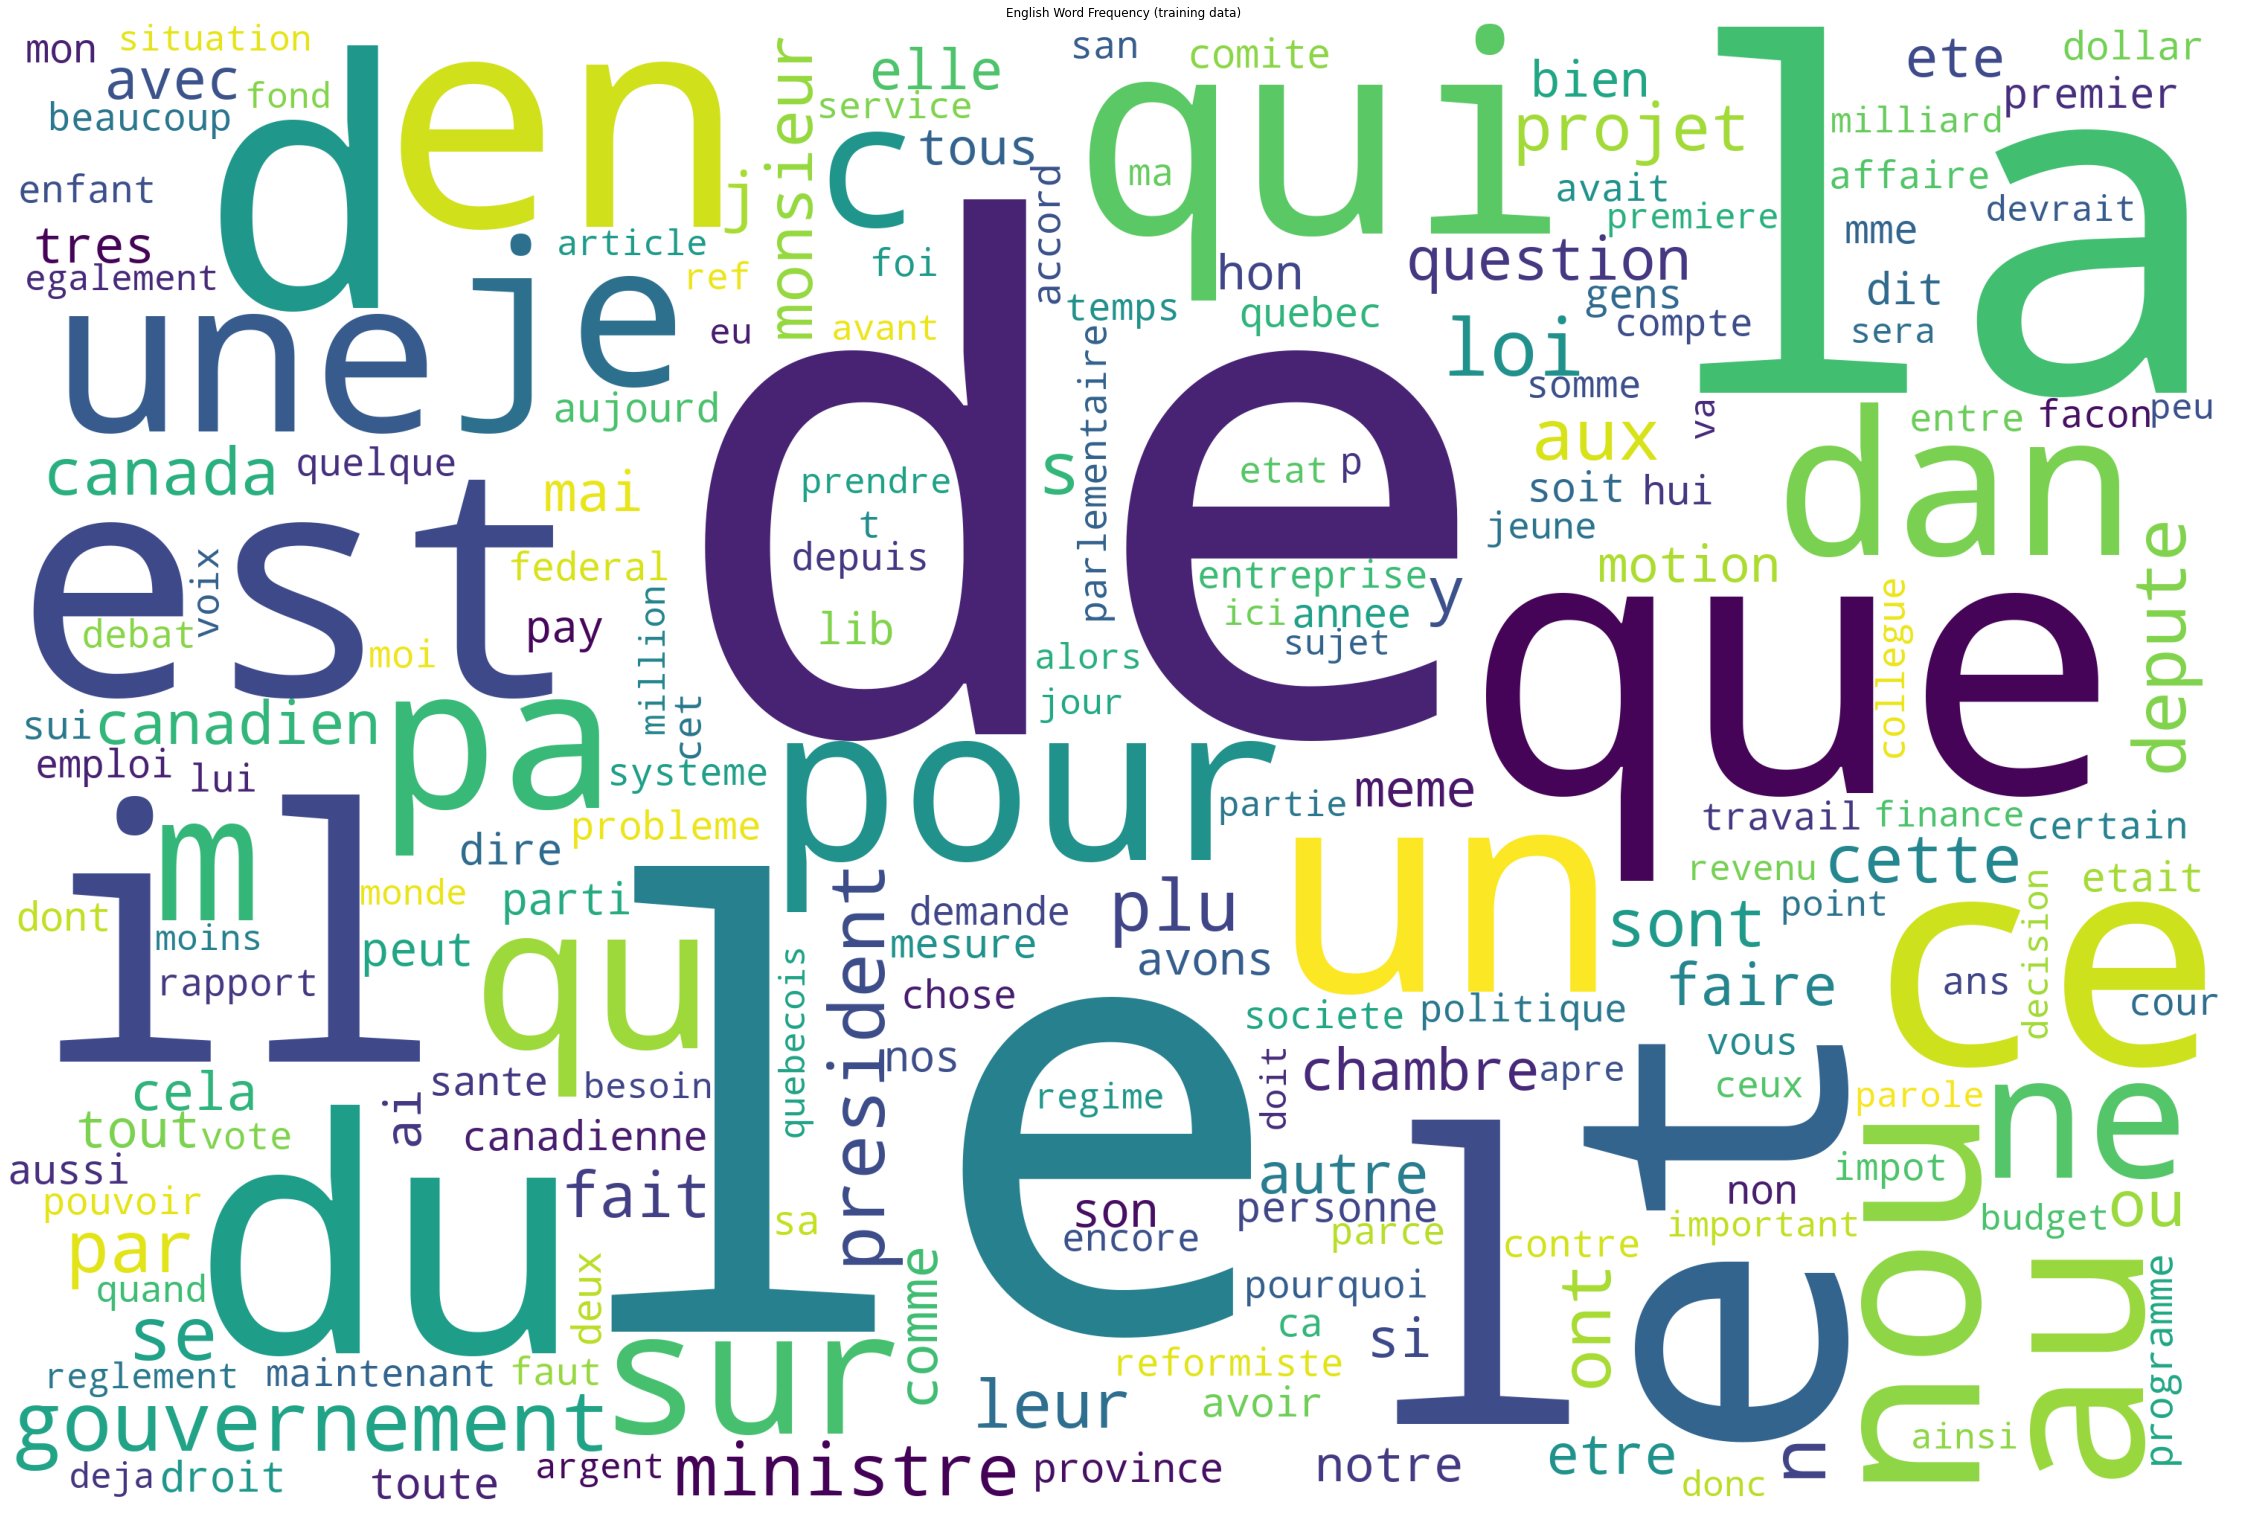

In [ ]:
eng = [p[0] for p in train_pairs]
fre = [p[1] for p in train_pairs]

#generate word cloud
text = "\n".join(eng) # the input of the wordcloud generator
# , stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', stopwords = None, collocations=False).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("English Word Frequency (training data)")
plt.show()

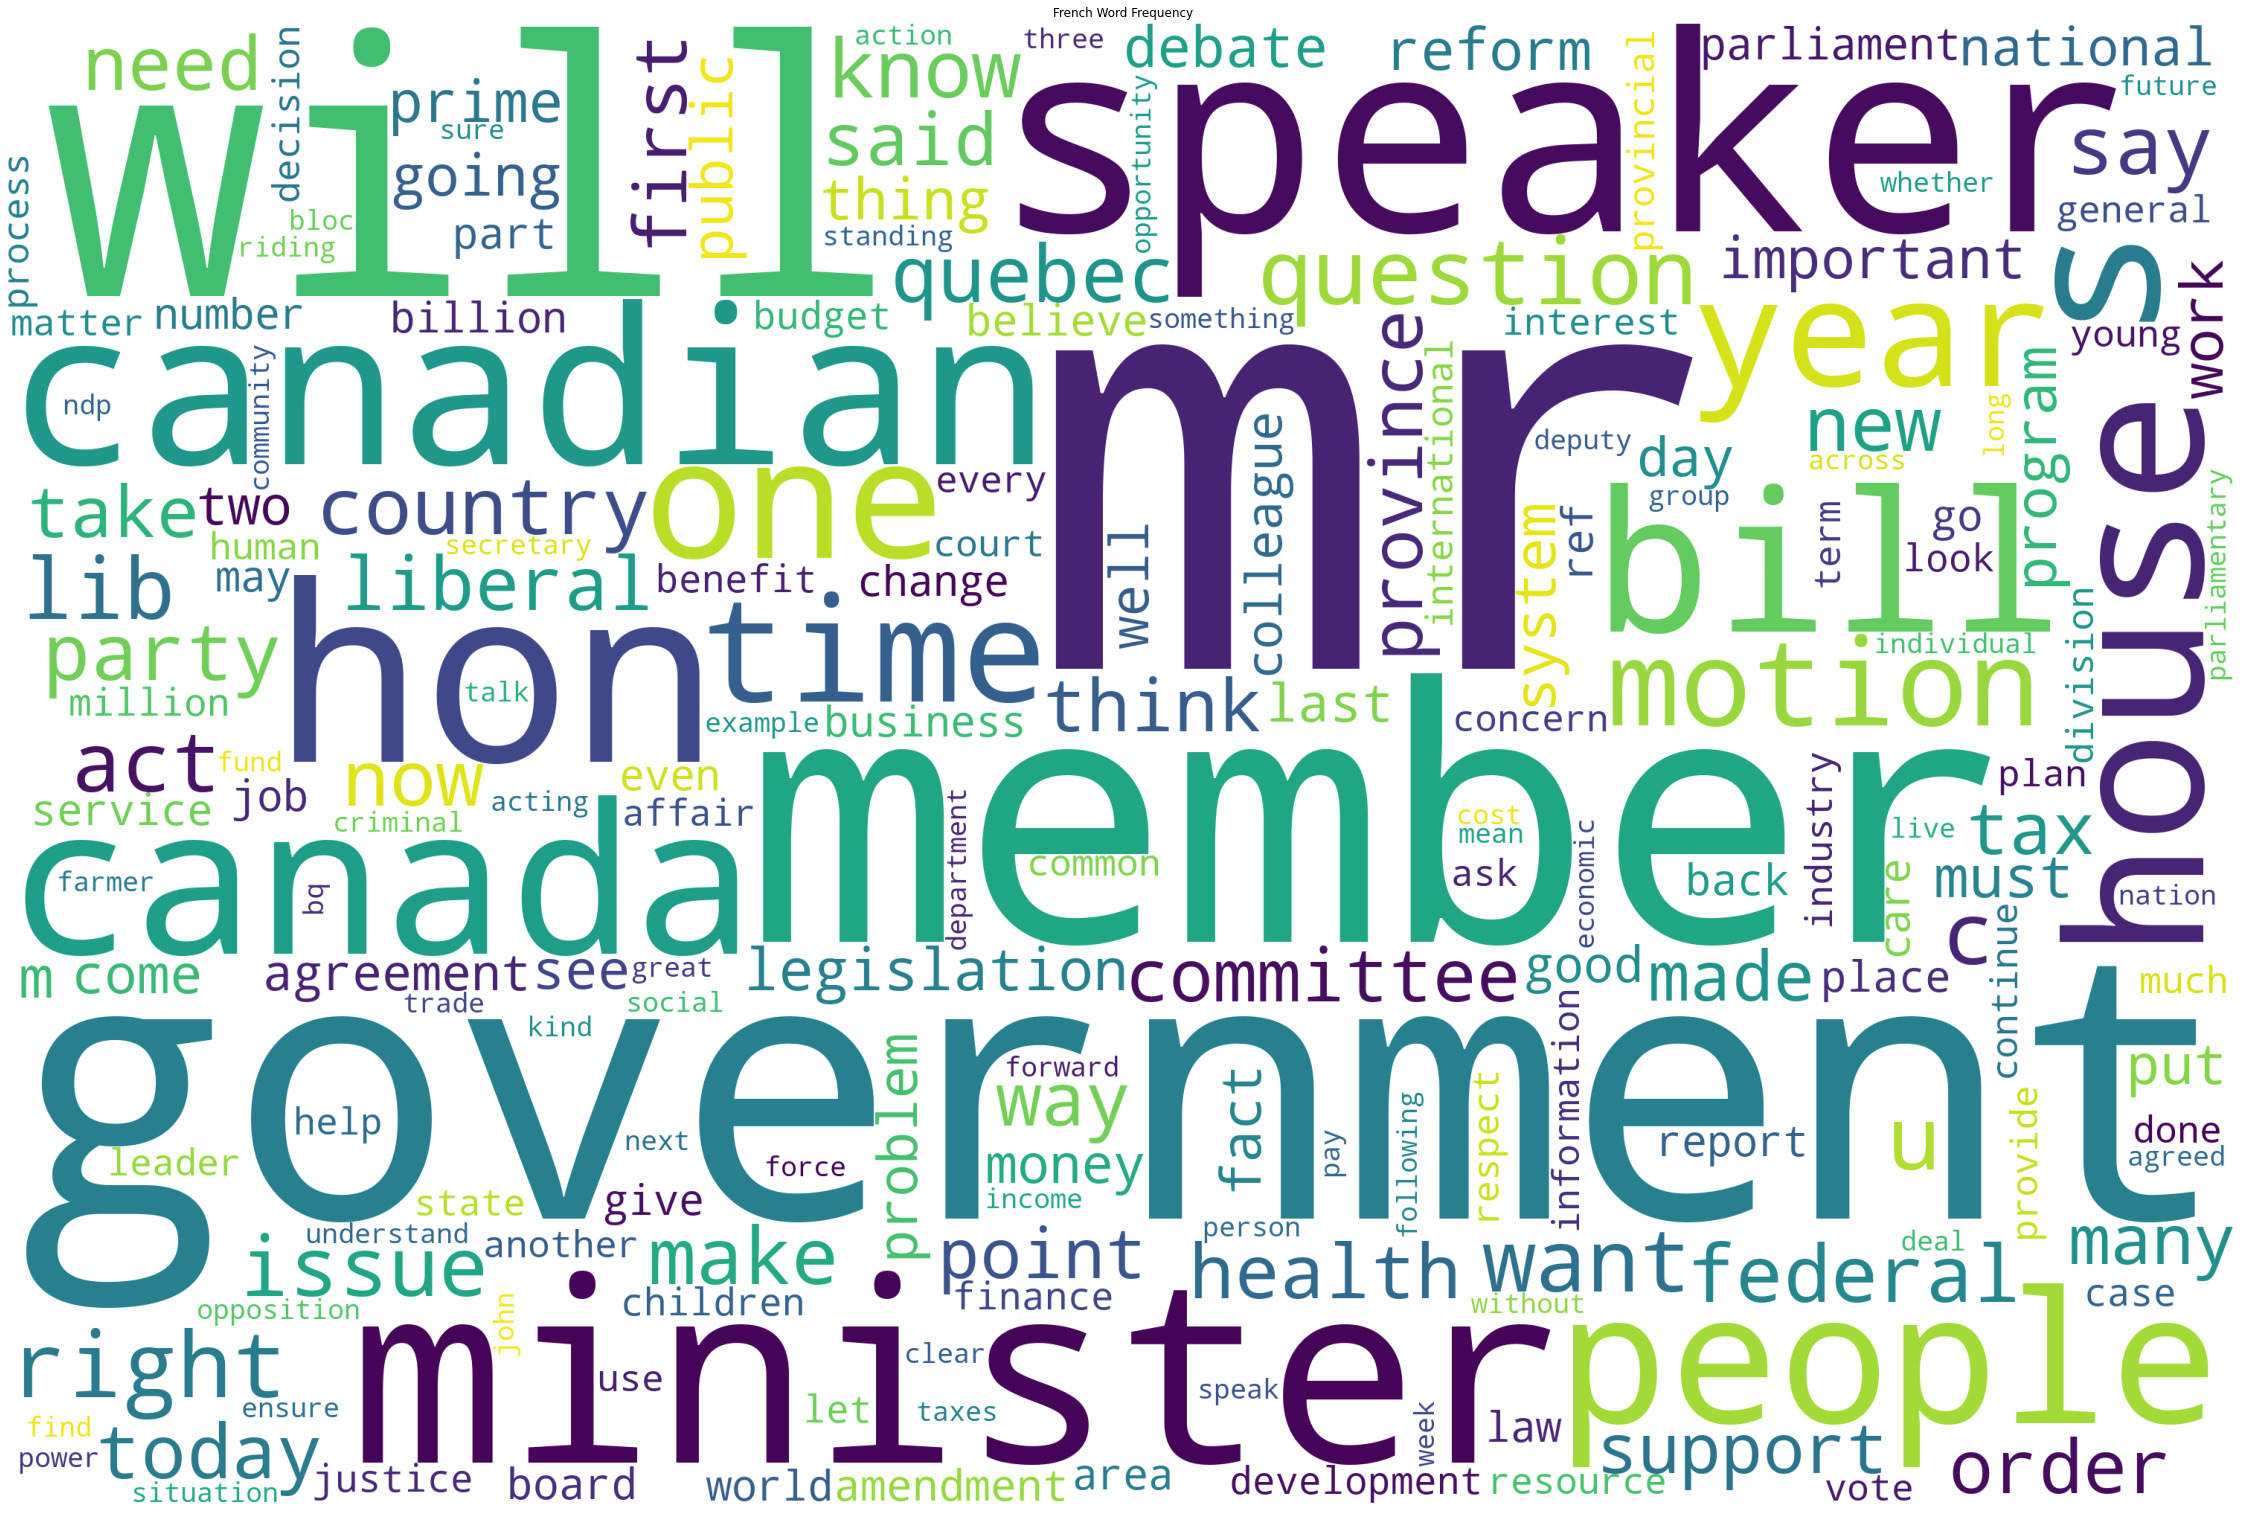

In [ ]:
text = "\n".join(fre) # the input of the wordcloud generator
# , stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("French Word Frequency")
plt.show()

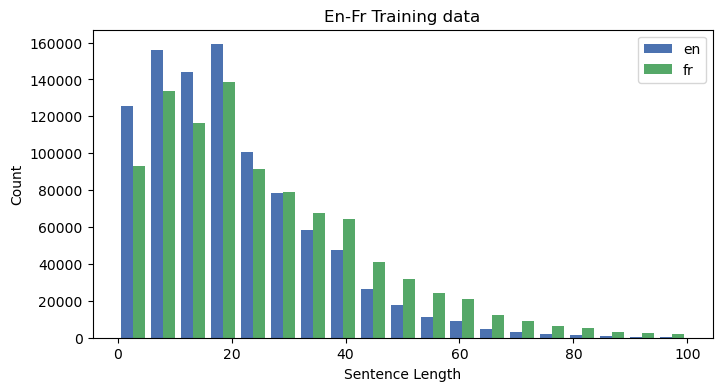

In [ ]:

# FIXME: Visualize - sentence length
# arr_x = np.array(x)
# arr_y = np.array(y)
# # len(arr[arr < 100])
# # len(arr)
# plt.style.use('seaborn-deep')
# bins = np.linspace(0, 100, 20)
# plt.figure(figsize=(8,4))
# plt.hist([x, y], bins, label=['en', 'fr'])
# plt.xlabel('Sentence Length')
# plt.ylabel('Count')
# plt.title('En-Fr Training data')
# plt.legend(loc='upper right')

# # plt.show()
# plt.savefig('hist_sentences.png')


In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

# visualization - after BPE
### implement BPE
from transformers import AutoTokenizer#, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
# model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr").to('cuda')

print('[French]')
for f in fre[-3:]:
    tok=tokenizer(f)#,return_tensors='pt')
    print('BPE tokenized:',tokenizer.convert_ids_to_tokens(tok['input_ids']))
print()
print('[English]')
for e in eng[-3:]:
    tok=tokenizer(e)
    print('BPE tokenized:', tokenizer.convert_ids_to_tokens(tok['input_ids']))

[French]
BPE tokenized: ['▁the', '▁time', '▁provided', '▁for', '▁the', '▁consideration', '▁of', '▁private', '▁members', '▁business', '▁has', '▁now', '▁expired', '▁and', '▁the', '▁order', '▁is', '▁dropped', '▁to', '▁the', '▁bottom', '▁of', '▁the', '▁order', '▁of', '▁precedence', '▁on', '▁the', '▁order', '▁paper', '▁.', '</s>']
BPE tokenized: ['▁it', '▁being', '▁.', '▁p', '▁.', 'm', '▁.', '▁the', '▁house', '▁stands', '▁adjourned', '▁until', '▁mon', 'day', '▁next', '▁at', '▁a', '▁.', 'm', '▁.', '▁pursuant', '▁to', '▁standing', '▁order', '▁.', '</s>']
BPE tokenized: ['▁the', '▁house', '▁adjourned', '▁at', '▁.', '▁p', '▁.', 'm', '▁.', '</s>']

[English]
BPE tokenized: ['▁la', '▁period', 'e', '▁reserve', 'e', '▁a', '▁l', '▁e', 'tude', '▁des', '▁initiatives', '▁par', 'lement', 'aires', '▁est', '▁main', 'ten', 'ant', '▁eco', 'ule', 'e', '▁et', '▁l', '▁article', '▁re', 't', 'ombe', '▁au', '▁bas', '▁de', '▁la', '▁list', 'e', '▁de', '▁prior', 'ite', '▁du', '▁f', 'eu', 'ille', 'ton', '▁.', '</s>']

# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

**We use BLEU Score as our evaluation metric. The BLEU score compares the N-gram of the automatic translation with the consecutive phrases it finds in the reference translation, and counts the number of matches, in a weighted fashion. BLEU’s strength is that it correlates well with human judgment by averaging out individual sentence judgment errors over a test corpus, rather than attempting to devise the exact human judgment for every sentence. We are using BLEU score is because it is the most widely used metric in machine translation.**

What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

**We use cross-entropy as loss function. We didn't try other since it is a classification problem with dependency. ** 

How did you split your data into train and test sets? Why?

**The data has train set and two test set. And the original train set is our train set, and one of the test set is our validation set during training and another test set is our test set.**


In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo
from torchtext.data.metrics import bleu_score
import torch

TRG_PAD_IDX = TRG_field.vocab.stoi[TRG_field.pad_token]
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)
loss = criterion(trg_data,model_output)

# this is our implemention of baseline model, there is slightly diffference other model
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    model.eval()      
    if isinstance(sentence, str):
        tokens = [token.text.lower() for token in spacy_fr(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(1).to(device)

    src_len = torch.LongTensor([len(src_indexes)])
    
    with torch.no_grad():
        hidden, cell = model.encoder(src_tensor)
        
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)
                
        with torch.no_grad():
            output, hidden, cell = model.decoder(trg_tensor, hidden, cell)
            
        pred_token = output.argmax(1).item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:]

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['fr']
        trg = vars(datum)['en']
        
        pred_trg= translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)
bleu_score = calculate_bleu(test_data, SRC_field, TRG_field, model, device)
print(f'BLEU score = {bleu_score*100:.2f}')

## Baselines 

What baselines did you compare against? Why are these reasonable?

**Our baseline is Sae2Seq model with LSTM. The baseline model is a very classific model in the task of machine translaiton and it is one of the SOTA model in machine translation few years ago.**

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

**Yes. Other methods also use LSTM baseline in machine translation task, not only for English-to-French translation but also in English-to-Germany translation.**

<!-- We survey other recent machine translation paper and methods. We didn't find any related work performed on this dataset.  -->

<!-- Yes. Our baseline model is one of the SOTA model in machine translation few years ago. But we don't find any baselines have performed on this dataset -->

## Methods

What methods did you choose? Why did you choose them?

**Our model is Sqe2seq. Our baseline model is Sqe2seq with lstm. Also, we have as attention to RNN based Seq2seq with GRU and acheive better result. We also use transformer based methods, which has strong ability in modeling text.  We further try large-scale pretrained langugage models, since they can capture the correlation between texts in different languages.**

How did you train these methods, and how did you evaluate them? Why?

**At each iteration, we get the source and target sentences from the batch. We feed the source and target into the model to get the output. During the decoder part, we add teacher force for next word prediction.**

Which methods were easy/difficult to implement and train? Why?

**Seq2seq with LSTM is the most difficult to implement. Because the sentence representation is the final hidden layer and might forget the previous information. Also it's very sensitive to learning rate. Pretrained Language model based method is very easy to train, since the large-scale parameters in language model has already been trained well, we only need to fine-tune part of the parameters using training data.**

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?
**Batch size, learning rate and epochs. Batch size is related to the memory while the batch size doesn't affect the result much. So if memory available, we increase the batch size to speed up. The learning rate is tricky and for RNN based model, we times 0.8 to the learning rate after each epochs. And the validation loss doesn't decrease significantly after 2-3 epochs, so we do early stopping.**

In [ ]:
|import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datasets

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset

from transformers import AutoTokenizer, AutoModelWithLMHead, Trainer, TrainingArguments

Training loss and validation loss when training

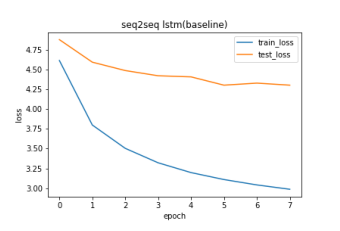

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
pic = mpimg.imread('lstm.png') 
plt.imshow(pic)
plt.axis('off')
plt.show()

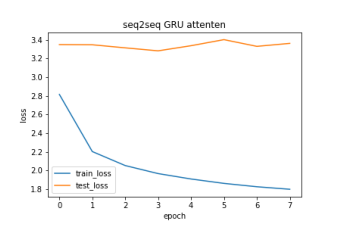

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
pic = mpimg.imread('attnetion.png') 
plt.imshow(pic)
plt.axis('off')
plt.show()

## Model

<a id='LSTM'></a>
###LSTM 
github link for LSTM https://github.com/guoyihonggyh/Hansard-English-French-Translation/blob/main/RNN_based_model.ipynb

In [ ]:
!pip install torchtext==0.8
# import package
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.datasets import TranslationDataset
from torchtext.data import Field,TabularDataset,Iterator,BucketIterator
from spacy.lang.en import English
from spacy.lang.de import German
from spacy.lang.fr import French
import spacy
import numpy as np
import random
import math
import time
import unicodedata
import string
import re
import random

#### preprocess data

In [ ]:
## Mount Google Drive Data (If using Google Colaboratory)
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("Mounting Failed.")
# unzip data
import zipfile
import os
from tqdm import tqdm, trange

! tar xvf /content/gdrive/MyDrive/Colab\ Notebooks/ml/hansard.36.r2001-1a.house.debates.training.tar
! tar xvf /content/gdrive/MyDrive/Colab\ Notebooks/ml/hansard.36.r2001-1a.house.debates.testing.tar
% cd /content/hansard.36/Release-2001.1a/sentence-pairs/house/debates/development/testing/1
! gunzip *.gz
% cd /content/hansard.36/Release-2001.1a/sentence-pairs/house/debates/development/testing/2
! gunzip *.gz
% cd /content/hansard.36/Release-2001.1a/sentence-pairs/house/debates/development/training
! gunzip *.gz


In [ ]:
# load data file
dir = '/content/hansard.36/Release-2001.1a/sentence-pairs/house/debates/development/{}ing/'
def load_data(mode):
    if mode == 'train':
        file_dir = dir.format('train')
    elif mode == 'dev':
        file_dir = dir.format('test') + '1/'
    elif mode == 'test':
        file_dir = dir.format('test') + '2/'
    else:
        raise Exception("select mode: train / dev / test")
        
    filenames = []
    fr_files = []
    en_files = []
    # for filename in os.listdir(file_dir):
    for filename in os.listdir(file_dir):
        if filename.split('.')[-1] == 'e':
          myfile = '.'.join(filename.split('.')[:-1])
          fr_files.append(myfile+'.f')
          en_files.append(myfile+'.e')

    
    en_data = load_from_sorted_files(en_files, file_dir)
    fr_data = load_from_sorted_files(fr_files, file_dir)
    print('en sentences:', len(en_data))
    print('fr sentences:', len(fr_data))
    return [en_data, fr_data]

def load_from_sorted_files(files, file_dir):
    dataset = []
    for file in tqdm(files):
        try:
          with open(file_dir+file, 'r', encoding='latin-1') as f:
              lines = f.readlines()
              for i in range(len(lines)):
                  line = lines[i]
                  line = line.strip()

                  dataset.append(line)
        except:
          continue
    return dataset
en_data_tr, fr_data_tr = load_data('train')
en_data_dev, fr_data_dev = load_data('dev')
en_data_te, fr_data_te = load_data('test')
spacy_en = English()
spacy_fr = French()
def tokenize_fr(text):
    return [tok.text for tok in spacy_fr.tokenizer(text)][::-1]

def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

SRC_field = Field(tokenize = tokenize_fr, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True)

TRG_field = Field(tokenize = tokenize_en, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True)
import pandas as pd

d= []
count = 0
for i in range(len(en_data_tr)):
  # if count>100:
  #   break

  if len(en_data_tr[i].split(' '))>=60:
    continue
  # count += 1
  d.append([fr_data_tr[i],en_data_tr[i]])

train = pd.DataFrame(data=d,
             columns = ['fr','en'])
train.to_csv("./train.csv", index=False)

d= []
for i in range(len(en_data_dev)):
  # if i>100:
  #   break
  if len(en_data_dev[i].split(' '))>=60:
    continue
  d.append([fr_data_dev[i],en_data_dev[i]])

test = pd.DataFrame(data=d,
             columns = ['fr','en'])
test.to_csv("./val.csv", index=False)

d= []
for i in range(len(en_data_te)):
  # if i>100:
  #   break
  if len(en_data_te[i].split(' '))>=60:
    continue
  d.append([fr_data_te[i],en_data_te[i]])

test = pd.DataFrame(data=d,
             columns = ['fr','en'])
test.to_csv("./test.csv", index=False)
fields = [('fr', SRC_field), ('en', TRG_field)]

train_data, valid_data, test_data= TabularDataset.splits(path='./', train='train.csv', validation='val.csv', test = 'test.csv', format='csv', fields=fields)
SRC_field.build_vocab(train_data, min_freq = 2)
TRG_field.build_vocab(train_data, min_freq = 2)

BATCH_SIZE = 128
train_iterator = BucketIterator(
    train_data, 
    batch_size = BATCH_SIZE, 
    shuffle=True,
    device = device)
valid_iterator = BucketIterator(
    valid_data, 
    batch_size = BATCH_SIZE, 
    device = device)
test_iterator = BucketIterator(
    test_data, 
    batch_size = BATCH_SIZE, 
    device = device)

#### construct model

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers        
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        self.dropout = nn.Dropout(dropout)
        self.embedding = nn.Embedding(input_dim, emb_dim)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))
        outputs, (hidden, cell) = self.rnn(embedded)
        return hidden, cell


class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        prediction = self.fc_out(output.squeeze(0))
        return prediction, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):

        batch_size = trg.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        
        hidden, cell = self.encoder(src)
        input = trg[0,:]
        
        for t in range(1, trg_length):

            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[t] = output

            if random.random() < teacher_forcing_ratio:
              input = trg[t]
            else:
              input = output.argmax(1)
        return outputs


#### train and evaluate

In [ ]:
def train(model, iterator, optimizer = optimizer, criterion = criterion, clip = 1):
    
    model.train()
    loss_epochs = 0
    
    for i, batch in enumerate(iterator):
        loss = 0

        src_data = batch.fr
        trg_data = batch.en
        
        optimizer.zero_grad()
        
        output = model(src_data, trg_data)
        output = output[1:].view(-1, output.shape[-1])

        trg_data = trg_data[1:].view(-1)

        
        loss = criterion(output, trg_data)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        loss_epochs += loss.item()

    return loss_epochs / len(iterator)
def evaluate(model, iterator, criterion = criterion):
    
    model.eval()
    
    loss_epoch = 0
    
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            src_data = batch.fr
            trg_data = batch.en

            output = model(src_data, trg_data, 0)
            output = output[1:].view(-1, output.shape[-1])

            trg_data = trg_data[1:].view(-1)


            loss = criterion(output, trg_data)
            loss_epoch += loss.item()
        
    return loss_epoch / len(iterator)
N_EPOCHS = 8

best_valid_loss = float('inf')
total_train_loss = []
total_valid_loss = []


for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator)
    total_train_loss.append(train_loss)
    valid_loss = evaluate(model, valid_iterator)
    total_valid_loss.append(valid_loss)

    for p in optimizer.param_groups:
      p['lr'] *=0.8
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = cal_time_cost(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/ml/lstm_RNN_Based_Model.pt')
    
    print(f'Epoch: {epoch+1:02}, Time: {epoch_mins}m {epoch_secs}s')
    print(f',Train Loss is: {train_loss:.3f}')
    print(f',Validation Loss: {valid_loss:.3f}')
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Colab Notebooks/ml/lstm_RNN_Based_Model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'Test Loss is: {test_loss:.3f} ')

In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):
    model.eval()      
    if isinstance(sentence, str):
        tokens = [token.text.lower() for token in spacy_fr(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(1).to(device)

    src_len = torch.LongTensor([len(src_indexes)])
    
    with torch.no_grad():
        hidden, cell = model.encoder(src_tensor)
        
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)
                
        with torch.no_grad():
            output, hidden, cell = model.decoder(trg_tensor, hidden, cell)
            
        pred_token = output.argmax(1).item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:]
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['fr']
        trg = vars(datum)['en']
        
        pred_trg= translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)
bleu_score = calculate_bleu(test_data, SRC_field, TRG_field, model, device)
print(f'BLEU score = {bleu_score*100:.2f}')

<a id='GRU'></a>

### GRU+Attention Method

This model share the same data preprocessing part as LSTM method

github link for GRU + Attention https://github.com/guoyihonggyh/Hansard-English-French-Translation/blob/main/RNN_Attention.ipynb

#### construct model

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True)
        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_len): 
        embedded = self.dropout(self.embedding(src))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, src_len.to('cpu'))  
        packed_outputs, hidden = self.rnn(packed_embedded)      
        outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs) 
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))
        
        return outputs, hidden
  
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        
        self.attention_function = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.linear_function = nn.Linear(dec_hid_dim, 1, bias = False)
        self.softmax = torch.nn.Softmax(dim = 1)
        
    def forward(self, hidden, encoder_outputs, mask):
        
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]

        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        energy_ = torch.tanh(self.attention_function(torch.cat((hidden, encoder_outputs), dim = 2))) 
        attention = self.linear_function(energy_).squeeze(2)
        attention = attention.masked_fill(mask == 0, -1e15)
        return self.softmax(attention)

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, attention):
        super().__init__()
        self.output_dim = output_dim
        self.attention = attention
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.GRU((enc_hid_dim * 2) + emb_dim, dec_hid_dim)
        self.fc_out = nn.Linear((enc_hid_dim * 2) + dec_hid_dim + emb_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, encoder_outputs, mask):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        a = self.attention(hidden, encoder_outputs, mask)

        a = a.unsqueeze(1)

        
        encoder_outputs = encoder_outputs.permute(1, 0, 2)

        
        weighted = torch.bmm(a, encoder_outputs)
        
        weighted = weighted.permute(1, 0, 2)

        
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        
            
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        
        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim = 1))
        
        return prediction, hidden.squeeze(0), a.squeeze(1)
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.device = device
        
    def create_mask(self, src):
        mask = (src != self.src_pad_idx).permute(1, 0)
        return mask
        
    def forward(self, src, src_len, trg, teacher_forcing_ratio = 0.5):
                    
        batch_size = src.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        encoder_outputs, hidden = self.encoder(src, src_len)
        input = trg[0,:]
        
        mask = self.create_mask(src)

                
        for t in range(1, trg_len):

            output, hidden, _ = self.decoder(input, hidden, encoder_outputs, mask)
            
            outputs[t] = output
            
            teacher_force = random.random() < teacher_forcing_ratio
            if random.random() < teacher_forcing_ratio:
              input = trg[t]
            else:
              input = output.argmax(1)      
        return outputs

In [ ]:
INPUT_DIM = len(SRC_field.vocab)
OUTPUT_DIM = len(TRG_field.vocab)
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
ENC_HID_DIM = 512
DEC_HID_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1
SRC_PAD_IDX = SRC_field.vocab.stoi[SRC_field.pad_token]

attention_model = Attention(ENC_HID_DIM, DEC_HID_DIM)
enc = Encoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attention_model)

model = Seq2Seq(enc, dec, SRC_PAD_IDX, device).to(device)
def init_weights(m):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)
            
model.apply(init_weights)
TRG_PAD_IDX = TRG_field.vocab.stoi[TRG_field.pad_token]
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

#### train and evaluate

In [ ]:
def train(model, iterator, optimizer = optimizer, criterion = criterion, clip = 1):
    
    model.train()
    loss_epochs = 0
    
    for i, batch in enumerate(iterator):
        loss = 0

        src_data = batch.fr
        trg_data = batch.en
        
        optimizer.zero_grad()
        
        output = model(src_data, trg_data)
        output = output[1:].view(-1, output.shape[-1])

        trg_data = trg_data[1:].view(-1)

        
        loss = criterion(output, trg_data)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        loss_epochs += loss.item()

    return loss_epochs / len(iterator)
def evaluate(model, iterator, criterion = criterion):
    
    model.eval()
    
    loss_epoch = 0
    
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            src_data = batch.fr
            trg_data = batch.en

            output = model(src_data, trg_data, 0)
            output = output[1:].view(-1, output.shape[-1])

            trg_data = trg_data[1:].view(-1)


            loss = criterion(output, trg_data)
            loss_epoch += loss.item()
        
    return loss_epoch / len(iterator)
def cal_time_cost(start, end):
  cost = end - start
  minutes = int(cost / 60)
  seconds = int(cost - (minutes * 60))
  return minutes, seconds

In [ ]:
N_EPOCHS = 8

best_valid_loss = float('inf')
total_train_loss = []
total_valid_loss = []


for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator)
    total_train_loss.append(train_loss)
    valid_loss = evaluate(model, valid_iterator)
    total_valid_loss.append(valid_loss)

    for p in optimizer.param_groups:
      p['lr'] *=0.8
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = cal_time_cost(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/ml/lstm_RNN_Based_Model.pt')
    
    print(f'Epoch: {epoch+1:02}, Time: {epoch_mins}m {epoch_secs}s')
    print(f',Train Loss is: {train_loss:.3f}')
    print(f',Validation Loss: {valid_loss:.3f}')
# model.load_state_dict(torch.load('/content/gdrive/MyDrive/Colab Notebooks/ml/lstm_RNN_Based_Model.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'Test Loss is: {test_loss:.3f} ')

In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    model.eval()
        
    if isinstance(sentence, str):
        nlp = spacy.load('de')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(1).to(device)

    src_len = torch.LongTensor([len(src_indexes)])
    
    with torch.no_grad():
        encoder_outputs, hidden = model.encoder(src_tensor, src_len)

    mask = model.create_mask(src_tensor)
        
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    attentions = torch.zeros(max_len, 1, len(src_indexes)).to(device)
    
    for i in range(max_len):

        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)
                
        with torch.no_grad():
            output, hidden, attention = model.decoder(trg_tensor, hidden, encoder_outputs, mask)

        attentions[i] = attention
            
        pred_token = output.argmax(1).item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attentions[:len(trg_tokens)-1]
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):
    
    trgs = []
    pred_trgs = []
    
    for datum in data:
        
        src = vars(datum)['fr']
        trg = vars(datum)['en']
        
        pred_trg= translate_sentence(src, src_field, trg_field, model, device, max_len)
        
        #cut off <eos> token
        pred_trg = pred_trg[:-1]
        
        pred_trgs.append(pred_trg)
        trgs.append([trg])
        
    return bleu_score(pred_trgs, trgs)
bleu_score = calculate_bleu(test_data, SRC_field, TRG_field, model, device)
print(f'BLEU score = {bleu_score*100:.2f}')

### Transformer Method
github link for Transformer https://github.com/boyuanzheng010/Hansard-English-French-Translation/blob/main/transformer.ipynb

In [ ]:
! pip install -U spacy
! python -m spacy download en_core_web_sm
! python -m spacy download fr_core_news_sm

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from timeit import default_timer as timer

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Prepare Source Data

In [ ]:
SRC_LANGUAGE = 'en'
TGT_LANGUAGE = 'fr'

# Load Original Dataset
with open("/content/drive/MyDrive/ml/final_project/data/en_all.txt", "r") as f:
  Xs = [s.strip() for s in f.readlines()]
with open("/content/drive/MyDrive/ml/final_project/data/fr_all.txt", "r") as f:
  Ys = [s.strip() for s in f.readlines()]

# Split the data into training, validation and test sets
train_val_index = round(0.90*len(Xs))
val_test_index = round(0.97*len(Xs))

xtrain, ytrain = Xs[:train_val_index], Ys[:train_val_index]
xvalid, yvalid = Xs[train_val_index:val_test_index], Ys[train_val_index:val_test_index]
xtest, ytest = Xs[val_test_index:], Ys[val_test_index:]

train = [[xtrain[i], ytrain[i]] for i in range(len(xtrain))]
valid = [[xvalid[i], yvalid[i]] for i in range(len(valid))]
test = [[xtest[i], ytest[i]] for i in range(len(test))]

# Build vocabulary and transform text
token_transform = {}
vocab_transform = {}
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='fr_core_news_sm')

def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}
    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']
 
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator 
    train_iter = iter(train)
    # Create torchtext's Vocab object 
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(train_iter, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Set UNK_IDX as the default index. This index is returned when the token is not found. 
# If not set, it throws RuntimeError when the queried token is not found in the Vocabulary. 
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
  vocab_transform[ln].set_default_index(UNK_IDX)

#### Construct Model and Helper function for model structure

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None, 
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

#### Model Training

In [ ]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE, 
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [ ]:
# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]), 
                      torch.tensor(token_ids), 
                      torch.tensor([EOS_IDX])))

# src and tgt language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tesors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

In [ ]:
def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)
    
    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(train_dataloader)


def evaluate(model):
    model.eval()
    losses = 0

    val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)
        
        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

In [ ]:
NUM_EPOCHS = 18

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))


# function to generate output sequence using greedy algorithm 
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


# actual function to translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

### Pretrained Language Model Based Methods
github link for Pretrained Language Model https://github.com/boyuanzheng010/Hansard-English-French-Translation/blob/main/pretrained_models.ipynb

#### Unfined-tuned Pretrained Language Model

In [ ]:
# Load Original Dataset
with open("/content/drive/MyDrive/ml/final_project/data/en_all.txt", "r") as f:
  Xs = [s.strip() for s in f.readlines()]
with open("/content/drive/MyDrive/ml/final_project/data/fr_all.txt", "r") as f:
  Ys = [s.strip() for s in f.readlines()]

# Add textual prompts for T5 Model
Xs = [f"translate English to French: {x}" for x in Xs]

# Split the data into training, validation and test sets
train_val_index = round(0.90*len(Xs))
val_test_index = round(0.97*len(Xs))

xtrain, ytrain = Xs[:train_val_index], Ys[:train_val_index]
xvalid, yvalid = Xs[train_val_index:val_test_index], Ys[train_val_index:val_test_index]
xtest, ytest = Xs[val_test_index:], Ys[val_test_index:]

In [ ]:
# Load T5-Small model
model = AutoModelWithLMHead.from_pretrained("t5-small")
model.to(device)

# Load T5-Small model's tokenizer 
tokenizer = AutoTokenizer.from_pretrained("t5-small")

In [ ]:
# Directly use pretrained language model as encoder and decoder for translation
metric = datasets.load_metric('sacrebleu')

for i, (x, y) in enumerate(zip(xtest, ytest)):
  input_ids = tokenizer.encode(x, return_tensors="pt").to(device)

  # Forward in langauge model
  y_hat = model.generate(input_ids=input_ids, max_length=500)
  y_hat = np.array(y_hat[0].data.cpu())
  y_hat = tokenizer.decode(y_hat)
  metric.add(prediction=y_hat, reference=[y])

  # # Look predictions
  # print("=="*50)
  # print(f"  Input: {x}")
  # print(f"  Output: {y_hat}")
  # print(f"  Golden: {y}")

print(f"Test BLEU score : {metric.compute()["score"]}")  

#### Fined-Tuned Model

In [ ]:
# Prepare Data for fine-tuning
train_encodings = tokenizer.prepare_seq2seq_batch(src_texts=xtrain, tgt_texts=ytrain)
valid_encodings = tokenizer.prepare_seq2seq_batch(src_texts=xvalid, tgt_texts=yvalid)
train_set = datasets.Dataset.from_dict(train_encodings)
valid_set = datasets.Dataset.from_dict(valid_encodings)

In [ ]:
# Fine-Tune Language Model

# Instantiate Trainer for Fine-Tuning
training_args = TrainingArguments(output_dir="t5_output",
                                  evaluation_strategy="epoch",
                                  num_train_epochs=1,
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=8,
                                  seed=42)
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=train_set,
                  eval_dataset=valid_set)
# Train the model
trainer.train()

In [ ]:
# Directly use pretrained language model as encoder and decoder for translation
metric = datasets.load_metric('sacrebleu')

for i, (x, y) in enumerate(zip(xtest, ytest)):
  input_ids = tokenizer.encode(x, return_tensors="pt").to(device)

  # Forward in langauge model
  y_hat = model.generate(input_ids=input_ids, max_length=500)
  y_hat = np.array(y_hat[0].data.cpu())
  y_hat = tokenizer.decode(y_hat)
  metric.add(prediction=y_hat, reference=[y])

  # # Look predictions
  # print("=="*50)
  # print(f"  Input: {x}")
  # print(f"  Output: {y_hat}")
  # print(f"  Golden: {y}")

print(f"Test BLEU score : {metric.compute()["score"]}")  

### Pretrained Machine Translation Model

In [ ]:
# Load Original Dataset
with open("/content/drive/MyDrive/ml/final_project/data/en_all.txt", "r") as f:
  Xs = [s.strip() for s in f.readlines()]
with open("/content/drive/MyDrive/ml/final_project/data/fr_all.txt", "r") as f:
  Ys = [s.strip() for s in f.readlines()]

# Split the data into training, validation and test sets
train_val_index = round(0.90*len(Xs))
val_test_index = round(0.97*len(Xs))

xtrain, ytrain = Xs[:train_val_index], Ys[:train_val_index]
xvalid, yvalid = Xs[train_val_index:val_test_index], Ys[train_val_index:val_test_index]
xtest, ytest = Xs[val_test_index:], Ys[val_test_index:]

In [ ]:
# Load T5-Small model
model = AutoModelWithLMHead.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-fr")
model.to(device)

# Load T5-Small model's tokenizer 
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-tc-big-en-fr")

In [ ]:
# Directly use pretrained language model as encoder and decoder for translation
metric = datasets.load_metric('sacrebleu')

for i, (x, y) in enumerate(zip(xtest, ytest)):
  input_ids = tokenizer.encode(x, return_tensors="pt").to(device)

  # Forward in langauge model
  y_hat = model.generate(input_ids=input_ids, max_length=500)
  y_hat = np.array(y_hat[0].data.cpu())
  y_hat = tokenizer.decode(y_hat)
  metric.add(prediction=y_hat, reference=[y])

  # # Look predictions
  # print("=="*50)
  # print(f"  Input: {x}")
  # print(f"  Output: {y_hat}")
  # print(f"  Golden: {y}")

print(f"Test BLEU score : {metric.compute()["score"]}")  

## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

**The GRU with attention performs so well since in many cases, RNN based model has low BLEU compared with transformer. Maybe the attention contribute a lot to the model.**

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

**We have early stopping when the validation loss is stable.**



What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  
**Pretrained Language Model should generalize well to other dataset, since it is trained on general domain.We expect it to behave the same on other data.**



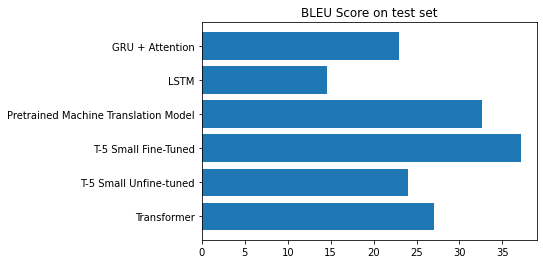

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

# Transformer: 27.04
# T-5 Small Unfine-tuned: 24.05
# T-5 Small Fine-Tuned: 37.13
# Pretrained Machine Translation Model: 32.59
# LSTM: 18.54
# GRU + Attention: 37
from matplotlib import pyplot as plt
BLEU = [27.04,24.05,37.13,32.59,14.54,23]
model_name = ['Transformer','T-5 Small Unfine-tuned','T-5 Small Fine-Tuned','Pretrained Machine Translation Model','LSTM','GRU + Attention']
plt.barh(model_name,BLEU)
plt.title('BLEU Score on test set')
plt.show()




Visualization of attention weight

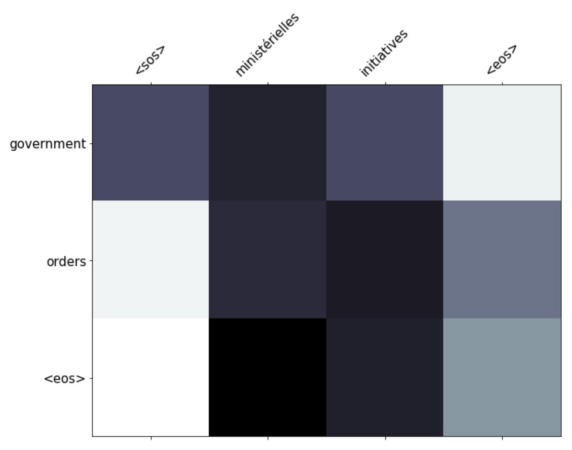

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
fig2 = plt.figure(figsize = (10,10)) 
pic = mpimg.imread('attention1.jpeg') 
plt.imshow(pic)
plt.axis('off')
plt.show()

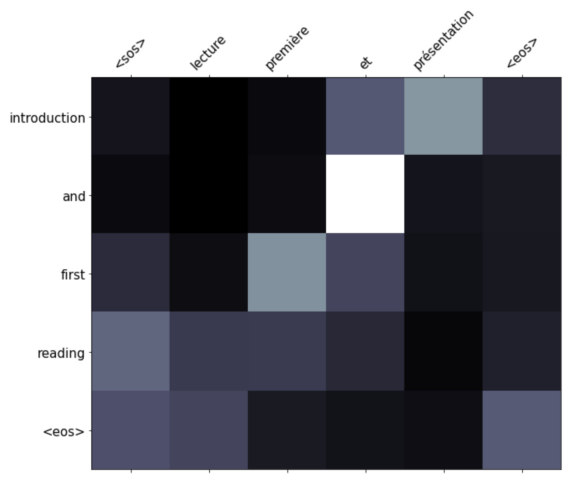

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
fig2 = plt.figure(figsize = (10,10)) 
pic = mpimg.imread('attention2.png') 
plt.imshow(pic)
plt.axis('off')
plt.show()

From the plot above, we see that the word with same meaning in French and English have higher attention weight.

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

What concepts from lecture/breakout were most relevant to your project? How so?

**We have furthered our understanding on RNN model and seq2seq model after implementation.**

What aspects of your project did you find most surprising?

**We have a great performance of T5 Model and also the RNN with attention also preform very good.**


What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?
**We should work more on our code management skills.**

What was the most helpful feedback you received during your presentation? Why?
**Discussion with TA about why the unfine-tuned language model could perform so well in English-to-French Translation task.**


If you had two more weeks to work on this project, what would you do next? Why?
**We would try whether we could perform data augumentation using the large English-French Parallel Corpus in WMT Workshop to improve model performance. We will also try to perform dual learning to perform reverse direction training to further improve model performance.**